#*Mounted* google drive


In [33]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Extract the image and keep it in a numpyarray for pictures numeric value


 Catagory of this folder : ['Lion', 'Tiger', 'Jaguar', 'Leopard', 'Cheetah'] 
Lion
Tiger
Jaguar
Leopard
Cheetah


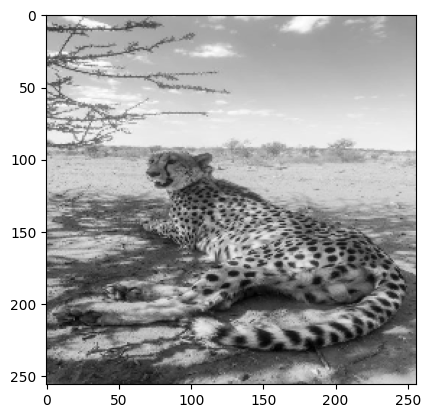

In [91]:

import os  # to read all this file
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import math



catagory=os.listdir('/content/drive/MyDrive/Animals')# it suplly folder location and print what ever is there
print(f' Catagory of this folder : {catagory} ')
for c in catagory:
    path = os.path.join('/content/drive/MyDrive/Animals', c)
    print(c)
    i = 0
    for img in os.listdir(path):
       img_array = cv2.imread(os.path.join(path, img))
       #print (type(img_array))
       plt.imshow(cv2.resize(cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY), (256, 256)), cmap='gray')



#processign Data

In [35]:
Train_data = []
for c in catagory:
    path = os.path.join('/content/drive/MyDrive/Animals', c)
    class_num = catagory.index(c)
    print(c)
    for img in  tqdm(os.listdir(path)):
       img_array = cv2.imread(os.path.join(path, img))
       img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
       img_array = cv2.resize(img_array, (70, 70))
       Train_data.append([img_array,class_num])
      #  print(Train_data) #print ([img_array,class_num])
print(f"Total number of images in all categories: {len(Train_data)}")





Lion


100%|██████████| 32/32 [00:00<00:00, 89.85it/s]


Tiger


100%|██████████| 39/39 [00:00<00:00, 75.59it/s]


Jaguar


100%|██████████| 30/30 [00:00<00:00, 46.80it/s]


Leopard


100%|██████████| 31/31 [00:00<00:00, 51.69it/s]


Cheetah


100%|██████████| 38/38 [00:00<00:00, 73.71it/s]

Total number of images in all categories: 170


#Converted Img into gray scle , reshape and showed 10 ppicture of every categories before shuffel (for checking labels are ok or not):

---




#Before shuffle the checking the picture and level

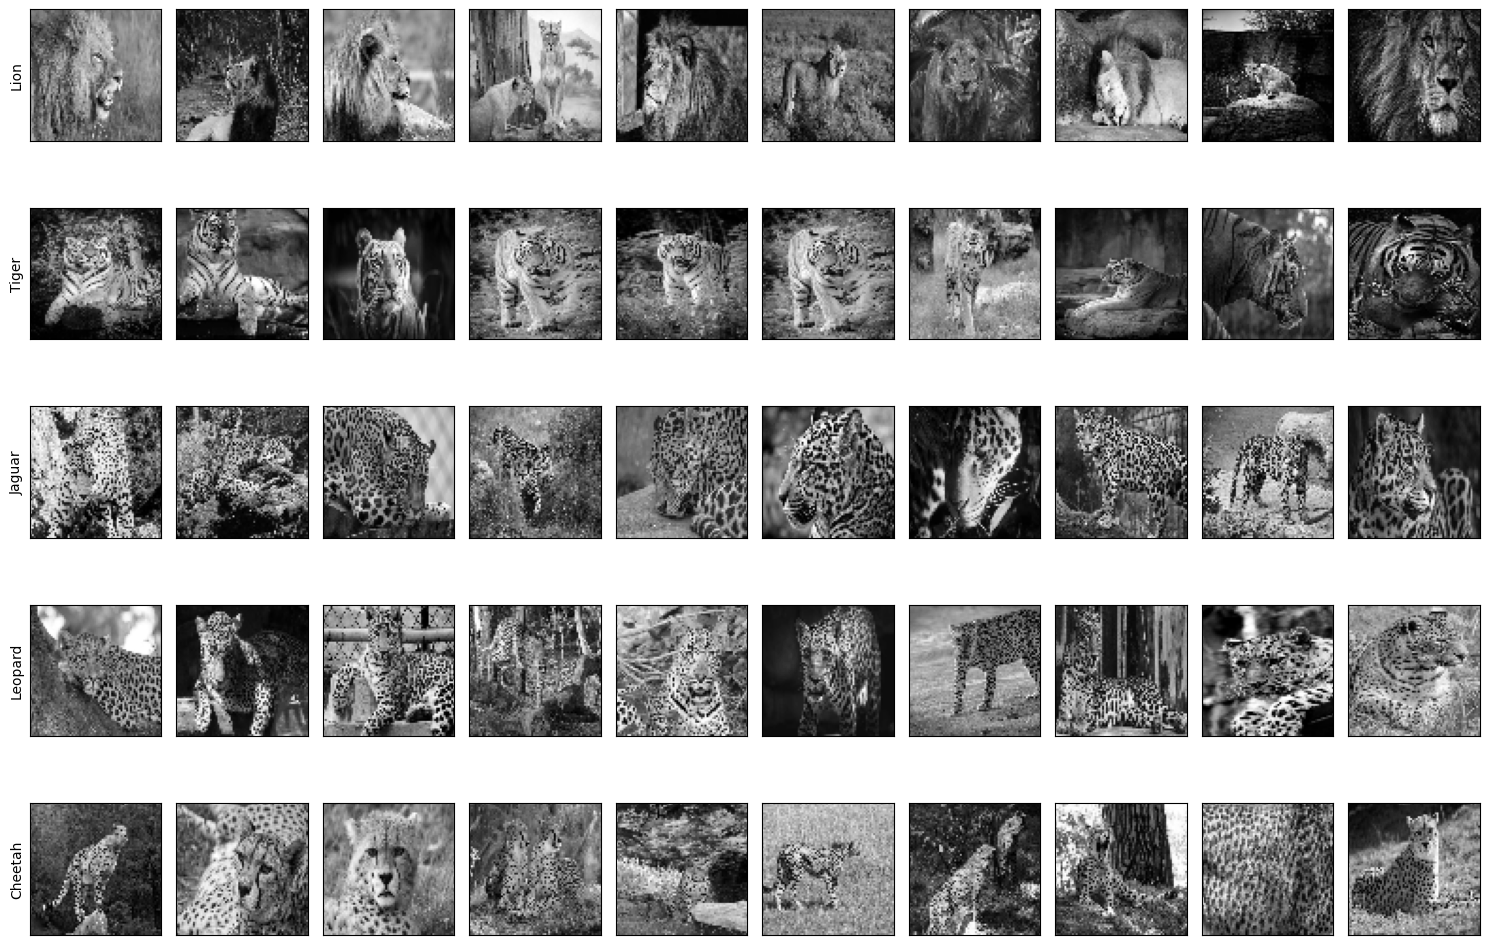

In [36]:
plt.figure(figsize=(15, 20))
i = 0

for c in catagory:
    path = os.path.join('/content/drive/MyDrive/Animals', c)
    for img_file in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_file))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img_array = cv2.resize(img_array, (70, 70))
        plt.subplot(10, 10, i + 1)
        plt.imshow(img_array, cmap='gray')
        if i % 10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()
plt.show()


#After shuffle



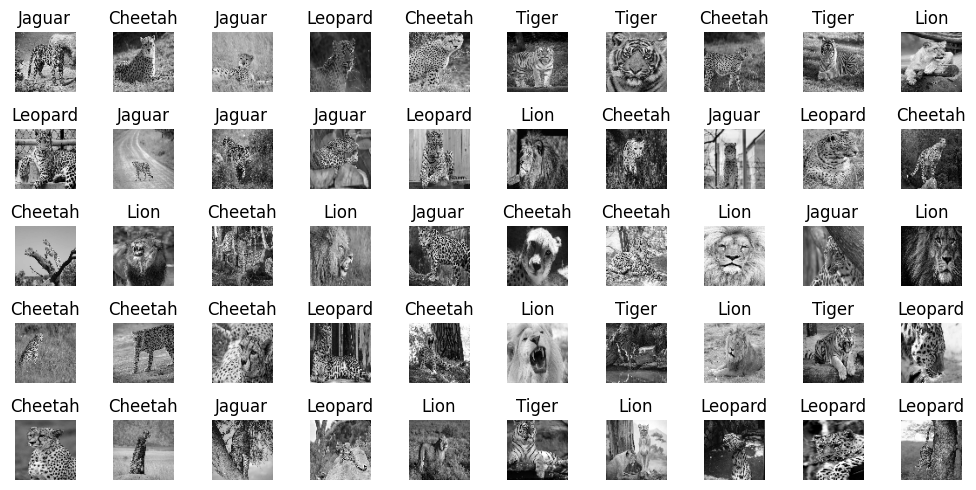

In [37]:
random.shuffle(Train_data)
plt.figure(figsize=(10, 5))

for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(Train_data[i][0], cmap='gray')
  plt.title(catagory[Train_data[i][1]])
  plt.axis('off')

plt.tight_layout()
plt.show()



#Creat 5 fold

In [38]:
# 5 fold
f1 = Train_data[0:33]
f2 = Train_data[34:67]
f3 = Train_data[68:101]
f4 = Train_data[102:134]
f5 = Train_data[135:169]

# Print each segment
print("f1:", f1)
print("f2:", f2)
print("f3:", f3)
print("f4:", f4)
print("f5:", f5)



f1: [[array([[ 47,  63,  69, ..., 102,  92,  80],
       [ 57,  71,  68, ..., 110,  97,  88],
       [ 51,  61,  61, ..., 120, 184, 181],
       ...,
       [ 44,  47, 151, ..., 192, 191, 146],
       [ 77,  25,  34, ..., 194, 137, 143],
       [ 67,  43,  84, ..., 171, 168, 176]], dtype=uint8), 2], [array([[ 15,   7,   5, ..., 117,  89,  86],
       [  6,   7,   9, ...,  96,  83,  77],
       [  7,   6,   8, ...,  84,  84,  98],
       ...,
       [111, 123, 179, ..., 109, 111,  59],
       [144, 137, 215, ..., 109,  99,  68],
       [133, 158, 217, ...,  83,  85,  88]], dtype=uint8), 4], [array([[138, 141, 143, ..., 139, 135, 134],
       [140, 137, 132, ..., 141, 133, 134],
       [139, 136, 135, ..., 142, 135, 130],
       ...,
       [133, 120, 111, ..., 133, 115, 139],
       [133, 133, 120, ..., 131, 131, 129],
       [144, 132, 141, ..., 138, 138, 134]], dtype=uint8), 2], [array([[60, 61, 47, ..., 27, 26, 36],
       [53, 53, 45, ..., 29, 28, 36],
       [43, 44, 42, ..., 33, 3

<!-- Euclidean (L2) **`bold text`** -->

#Formula of Euclidian Distance

In [88]:
def calc_l2_distance(x1, x2):
    return np.sqrt(np.sum(np.abs(x1 - x2)**2))

# calc_distance will return list of euclidian distance of top 30 neighbors


In [87]:
def calc_fold_distances(train, val, k_max):
    fold_distances = []
    for v in tqdm(val):
        distances = []
        for t in train:
            dist = calc_l2_distance(v[0], t[0])
            distances.append((t[1], dist))
        distances.sort(key=lambda x: x[1])
        fold_distances.append(distances[:k_max])
    return fold_distances



 # calculating L2 distances between validation samples and training samples for each fold, and stores the results

In [86]:
folds = [f1, f2, f3, f4, f5]
fold_distances = []  # Store distance results for each fold

for i in range(len(folds)):
    # Set the validation fold and use the rest for training
    validation = folds[i]
    train = sum(folds[:i] + folds[i+1:], [])

    print(f"\nFold {i+1}:")
    fold_distance = calc_fold_distances(train, validation, 30)

    fold_distances.append(fold_distance)
print (fold_distances)


Fold 1:


100%|██████████| 33/33 [00:00<00:00, 477.72it/s]



Fold 2:


100%|██████████| 33/33 [00:00<00:00, 465.84it/s]



Fold 3:


100%|██████████| 33/33 [00:00<00:00, 408.21it/s]



Fold 4:


100%|██████████| 32/32 [00:00<00:00, 402.33it/s]



Fold 5:


100%|██████████| 34/34 [00:00<00:00, 425.25it/s]

[[[(1, 685.1707816303903), (4, 688.4911037914724), (3, 691.2524864331411), (4, 692.3655104061727), (2, 693.05555332888), (4, 697.9777933430261), (3, 699.478377078234), (1, 700.3199268905605), (3, 702.3781033033418), (3, 703.058319060375), (4, 703.3349131103901), (3, 703.3349131103901), (1, 703.5694706281676), (4, 704.2748043200182), (4, 704.7935868039663), (4, 705.2340037179149), (0, 705.2609446155374), (3, 705.4027218546863), (3, 705.5054925370886), (0, 706.2096006144352), (3, 706.3993204979745), (3, 706.982319439461), (1, 707.4538854229298), (0, 707.514664158984), (2, 707.8523857415471), (0, 708.1186341284912), (1, 708.3438430592871), (1, 708.4687713654004), (3, 708.7665341986739), (1, 708.9633276834564)], [(0, 706.4453269715923), (4, 709.6802096719339), (1, 710.6166336358867), (0, 711.7316910184624), (4, 712.0049157133678), (3, 712.1172656241387), (0, 712.2148552227761), (4, 712.4640341799718), (4, 712.7061105392601), (4, 713.3302180617333), (3, 713.7807786708745), (4, 714.003501391

Top 5 prediction

# We’ll use a loop to perform cross-validation. In each iteration, one fold is treated as the validation set, while the remaining folds are combined to create the training set.  


1. For each sample in the validation set, we calculate the L2 distance between it and all the samples in the training set.  
2. We sort these distances and pick the  K -nearest neighbors to predict the label for the validation sample.  
3. After going through all the samples in the validation set, we calculate the accuracy for the current value of  K  and save it.  
4. At the end of the iteration, we calculate the midpoint accuracy for the fold (the average of the minimum and maximum accuracy for all  K values) and store it.  

at end of the process, we’ll have an array of midpoint accuracies for all folds and another array storing the accuracies for different  K -values in each fold.

In [89]:
K = list(range(1, 31))

Folder_accuracies = []
for fold in folds:
    Folder_accuracies.append([])

M_P_A_l2 = []


for i, validation in enumerate(folds):
    train = sum(folds[:i] + folds[i+1:], [])
    fold_accuracies = []

    for k in K:
        correct_predictions = 0

        for v in tqdm(validation):

            distances = [(calc_l2_distance(v[0], t[0]), t[1]) for t in train]
            distances.sort(key=lambda x: x[0])


            top_k_labels = [distances[i][1] for i in range(k)]
            pred_label = max(set(top_k_labels), key=top_k_labels.count)


            if pred_label == v[1]:
                correct_predictions += 1

        # Calculate accuracy for current K
        accuracy = correct_predictions / len(validation) * 100
        fold_accuracies.append(accuracy)
        print(f"Fold {i+1}, K = {k}: Accuracy = {accuracy:.2f}%")

    # Store accuracies and midpoint accuracy
    Folder_accuracies[i] = fold_accuracies
    M_P_A_l2.append((min(fold_accuracies) + max(fold_accuracies)) / 2)

# Calculate average midpoint accuracy for each K
average_midpoints = []
for k in range(len(K)):
    accuracies_at_k = [fold[k] for fold in Folder_accuracies]
    average_midpoints.append(np.mean(accuracies_at_k))


100%|██████████| 33/33 [00:00<00:00, 457.18it/s]


Fold 1, K = 1: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 411.70it/s]


Fold 1, K = 2: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 478.93it/s]


Fold 1, K = 3: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 431.88it/s]


Fold 1, K = 4: Accuracy = 15.15%


100%|██████████| 33/33 [00:00<00:00, 403.38it/s]


Fold 1, K = 5: Accuracy = 18.18%


100%|██████████| 33/33 [00:00<00:00, 357.00it/s]


Fold 1, K = 6: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 416.68it/s]


Fold 1, K = 7: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 448.74it/s]


Fold 1, K = 8: Accuracy = 18.18%


100%|██████████| 33/33 [00:00<00:00, 442.40it/s]


Fold 1, K = 9: Accuracy = 12.12%


100%|██████████| 33/33 [00:00<00:00, 455.71it/s]


Fold 1, K = 10: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 442.53it/s]


Fold 1, K = 11: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 465.40it/s]


Fold 1, K = 12: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 417.26it/s]


Fold 1, K = 13: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 413.85it/s]


Fold 1, K = 14: Accuracy = 18.18%


100%|██████████| 33/33 [00:00<00:00, 458.63it/s]


Fold 1, K = 15: Accuracy = 15.15%


100%|██████████| 33/33 [00:00<00:00, 461.23it/s]


Fold 1, K = 16: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 372.42it/s]


Fold 1, K = 17: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 296.59it/s]


Fold 1, K = 18: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 367.42it/s]


Fold 1, K = 19: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 473.84it/s]


Fold 1, K = 20: Accuracy = 30.30%


100%|██████████| 33/33 [00:00<00:00, 458.04it/s]


Fold 1, K = 21: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 432.05it/s]


Fold 1, K = 22: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 450.86it/s]


Fold 1, K = 23: Accuracy = 30.30%


100%|██████████| 33/33 [00:00<00:00, 463.62it/s]


Fold 1, K = 24: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 423.15it/s]


Fold 1, K = 25: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 409.54it/s]


Fold 1, K = 26: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 373.30it/s]


Fold 1, K = 27: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 371.56it/s]


Fold 1, K = 28: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 366.86it/s]


Fold 1, K = 29: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 367.40it/s]


Fold 1, K = 30: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 457.78it/s]


Fold 2, K = 1: Accuracy = 42.42%


100%|██████████| 33/33 [00:00<00:00, 459.98it/s]


Fold 2, K = 2: Accuracy = 36.36%


100%|██████████| 33/33 [00:00<00:00, 436.19it/s]


Fold 2, K = 3: Accuracy = 33.33%


100%|██████████| 33/33 [00:00<00:00, 409.87it/s]


Fold 2, K = 4: Accuracy = 33.33%


100%|██████████| 33/33 [00:00<00:00, 413.38it/s]


Fold 2, K = 5: Accuracy = 30.30%


100%|██████████| 33/33 [00:00<00:00, 464.31it/s]


Fold 2, K = 6: Accuracy = 30.30%


100%|██████████| 33/33 [00:00<00:00, 396.72it/s]


Fold 2, K = 7: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 432.06it/s]


Fold 2, K = 8: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 439.52it/s]


Fold 2, K = 9: Accuracy = 30.30%


100%|██████████| 33/33 [00:00<00:00, 332.85it/s]


Fold 2, K = 10: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 338.06it/s]


Fold 2, K = 11: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 364.44it/s]


Fold 2, K = 12: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 473.61it/s]


Fold 2, K = 13: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 451.83it/s]


Fold 2, K = 14: Accuracy = 33.33%


100%|██████████| 33/33 [00:00<00:00, 438.68it/s]


Fold 2, K = 15: Accuracy = 33.33%


100%|██████████| 33/33 [00:00<00:00, 421.96it/s]


Fold 2, K = 16: Accuracy = 33.33%


100%|██████████| 33/33 [00:00<00:00, 443.63it/s]


Fold 2, K = 17: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 431.45it/s]


Fold 2, K = 18: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 443.75it/s]


Fold 2, K = 19: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 423.18it/s]


Fold 2, K = 20: Accuracy = 18.18%


100%|██████████| 33/33 [00:00<00:00, 333.36it/s]


Fold 2, K = 21: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 356.42it/s]


Fold 2, K = 22: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 440.90it/s]


Fold 2, K = 23: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 466.96it/s]


Fold 2, K = 24: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 360.46it/s]


Fold 2, K = 25: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 232.79it/s]


Fold 2, K = 26: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 378.52it/s]


Fold 2, K = 27: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 450.86it/s]


Fold 2, K = 28: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 390.47it/s]


Fold 2, K = 29: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 417.92it/s]


Fold 2, K = 30: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 345.08it/s]


Fold 3, K = 1: Accuracy = 30.30%


100%|██████████| 33/33 [00:00<00:00, 347.46it/s]


Fold 3, K = 2: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 476.01it/s]


Fold 3, K = 3: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 454.20it/s]


Fold 3, K = 4: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 460.89it/s]


Fold 3, K = 5: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 432.38it/s]


Fold 3, K = 6: Accuracy = 15.15%


100%|██████████| 33/33 [00:00<00:00, 421.93it/s]


Fold 3, K = 7: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 450.63it/s]


Fold 3, K = 8: Accuracy = 15.15%


100%|██████████| 33/33 [00:00<00:00, 461.25it/s]


Fold 3, K = 9: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 470.18it/s]


Fold 3, K = 10: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 358.82it/s]


Fold 3, K = 11: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 275.37it/s]


Fold 3, K = 12: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 280.34it/s]


Fold 3, K = 13: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 247.09it/s]


Fold 3, K = 14: Accuracy = 24.24%


100%|██████████| 33/33 [00:00<00:00, 280.38it/s]


Fold 3, K = 15: Accuracy = 27.27%


100%|██████████| 33/33 [00:00<00:00, 290.05it/s]


Fold 3, K = 16: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 278.04it/s]


Fold 3, K = 17: Accuracy = 18.18%


100%|██████████| 33/33 [00:00<00:00, 301.52it/s]


Fold 3, K = 18: Accuracy = 15.15%


100%|██████████| 33/33 [00:00<00:00, 252.81it/s]


Fold 3, K = 19: Accuracy = 12.12%


100%|██████████| 33/33 [00:00<00:00, 256.94it/s]


Fold 3, K = 20: Accuracy = 15.15%


100%|██████████| 33/33 [00:00<00:00, 329.71it/s]


Fold 3, K = 21: Accuracy = 18.18%


100%|██████████| 33/33 [00:00<00:00, 279.38it/s]


Fold 3, K = 22: Accuracy = 18.18%


100%|██████████| 33/33 [00:00<00:00, 300.92it/s]


Fold 3, K = 23: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 296.37it/s]


Fold 3, K = 24: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 265.22it/s]


Fold 3, K = 25: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 297.61it/s]


Fold 3, K = 26: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 249.16it/s]


Fold 3, K = 27: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 303.37it/s]


Fold 3, K = 28: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 277.71it/s]


Fold 3, K = 29: Accuracy = 21.21%


100%|██████████| 33/33 [00:00<00:00, 273.34it/s]


Fold 3, K = 30: Accuracy = 21.21%


100%|██████████| 32/32 [00:00<00:00, 277.58it/s]


Fold 4, K = 1: Accuracy = 21.88%


100%|██████████| 32/32 [00:00<00:00, 290.93it/s]


Fold 4, K = 2: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 329.26it/s]


Fold 4, K = 3: Accuracy = 21.88%


100%|██████████| 32/32 [00:00<00:00, 320.34it/s]


Fold 4, K = 4: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 326.02it/s]


Fold 4, K = 5: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 265.19it/s]


Fold 4, K = 6: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 230.38it/s]


Fold 4, K = 7: Accuracy = 31.25%


100%|██████████| 32/32 [00:00<00:00, 267.71it/s]


Fold 4, K = 8: Accuracy = 37.50%


100%|██████████| 32/32 [00:00<00:00, 277.42it/s]


Fold 4, K = 9: Accuracy = 34.38%


100%|██████████| 32/32 [00:00<00:00, 266.90it/s]


Fold 4, K = 10: Accuracy = 34.38%


100%|██████████| 32/32 [00:00<00:00, 273.63it/s]


Fold 4, K = 11: Accuracy = 34.38%


100%|██████████| 32/32 [00:00<00:00, 294.19it/s]


Fold 4, K = 12: Accuracy = 34.38%


100%|██████████| 32/32 [00:00<00:00, 294.41it/s]


Fold 4, K = 13: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 237.61it/s]


Fold 4, K = 14: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 252.17it/s]


Fold 4, K = 15: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 291.36it/s]


Fold 4, K = 16: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 273.01it/s]


Fold 4, K = 17: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 256.74it/s]


Fold 4, K = 18: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 280.64it/s]


Fold 4, K = 19: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 267.30it/s]


Fold 4, K = 20: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 252.61it/s]


Fold 4, K = 21: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 263.51it/s]


Fold 4, K = 22: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 219.41it/s]


Fold 4, K = 23: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 339.29it/s]


Fold 4, K = 24: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 434.26it/s]


Fold 4, K = 25: Accuracy = 25.00%


100%|██████████| 32/32 [00:00<00:00, 421.94it/s]


Fold 4, K = 26: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 435.49it/s]


Fold 4, K = 27: Accuracy = 28.12%


100%|██████████| 32/32 [00:00<00:00, 430.34it/s]


Fold 4, K = 28: Accuracy = 31.25%


100%|██████████| 32/32 [00:00<00:00, 409.73it/s]


Fold 4, K = 29: Accuracy = 31.25%


100%|██████████| 32/32 [00:00<00:00, 327.73it/s]


Fold 4, K = 30: Accuracy = 28.12%


100%|██████████| 34/34 [00:00<00:00, 337.60it/s]


Fold 5, K = 1: Accuracy = 26.47%


100%|██████████| 34/34 [00:00<00:00, 356.00it/s]


Fold 5, K = 2: Accuracy = 26.47%


100%|██████████| 34/34 [00:00<00:00, 435.01it/s]


Fold 5, K = 3: Accuracy = 32.35%


100%|██████████| 34/34 [00:00<00:00, 423.83it/s]


Fold 5, K = 4: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 458.72it/s]


Fold 5, K = 5: Accuracy = 23.53%


100%|██████████| 34/34 [00:00<00:00, 435.83it/s]


Fold 5, K = 6: Accuracy = 14.71%


100%|██████████| 34/34 [00:00<00:00, 423.35it/s]


Fold 5, K = 7: Accuracy = 17.65%


100%|██████████| 34/34 [00:00<00:00, 441.68it/s]


Fold 5, K = 8: Accuracy = 17.65%


100%|██████████| 34/34 [00:00<00:00, 455.22it/s]


Fold 5, K = 9: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 429.29it/s]


Fold 5, K = 10: Accuracy = 26.47%


100%|██████████| 34/34 [00:00<00:00, 392.90it/s]


Fold 5, K = 11: Accuracy = 17.65%


100%|██████████| 34/34 [00:00<00:00, 352.27it/s]


Fold 5, K = 12: Accuracy = 26.47%


100%|██████████| 34/34 [00:00<00:00, 321.18it/s]


Fold 5, K = 13: Accuracy = 29.41%


100%|██████████| 34/34 [00:00<00:00, 364.49it/s]


Fold 5, K = 14: Accuracy = 29.41%


100%|██████████| 34/34 [00:00<00:00, 402.97it/s]


Fold 5, K = 15: Accuracy = 26.47%


100%|██████████| 34/34 [00:00<00:00, 433.26it/s]


Fold 5, K = 16: Accuracy = 26.47%


100%|██████████| 34/34 [00:00<00:00, 453.16it/s]


Fold 5, K = 17: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 421.64it/s]


Fold 5, K = 18: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 428.23it/s]


Fold 5, K = 19: Accuracy = 23.53%


100%|██████████| 34/34 [00:00<00:00, 456.41it/s]


Fold 5, K = 20: Accuracy = 23.53%


100%|██████████| 34/34 [00:00<00:00, 442.44it/s]


Fold 5, K = 21: Accuracy = 17.65%


100%|██████████| 34/34 [00:00<00:00, 396.48it/s]


Fold 5, K = 22: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 313.59it/s]


Fold 5, K = 23: Accuracy = 26.47%


100%|██████████| 34/34 [00:00<00:00, 390.67it/s]


Fold 5, K = 24: Accuracy = 23.53%


100%|██████████| 34/34 [00:00<00:00, 464.18it/s]


Fold 5, K = 25: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 358.08it/s]


Fold 5, K = 26: Accuracy = 17.65%


100%|██████████| 34/34 [00:00<00:00, 451.84it/s]


Fold 5, K = 27: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 448.47it/s]


Fold 5, K = 28: Accuracy = 23.53%


100%|██████████| 34/34 [00:00<00:00, 450.67it/s]


Fold 5, K = 29: Accuracy = 20.59%


100%|██████████| 34/34 [00:00<00:00, 427.95it/s]

Fold 5, K = 30: Accuracy = 23.53%


# Ploting vlaue L2 Accuracy graph

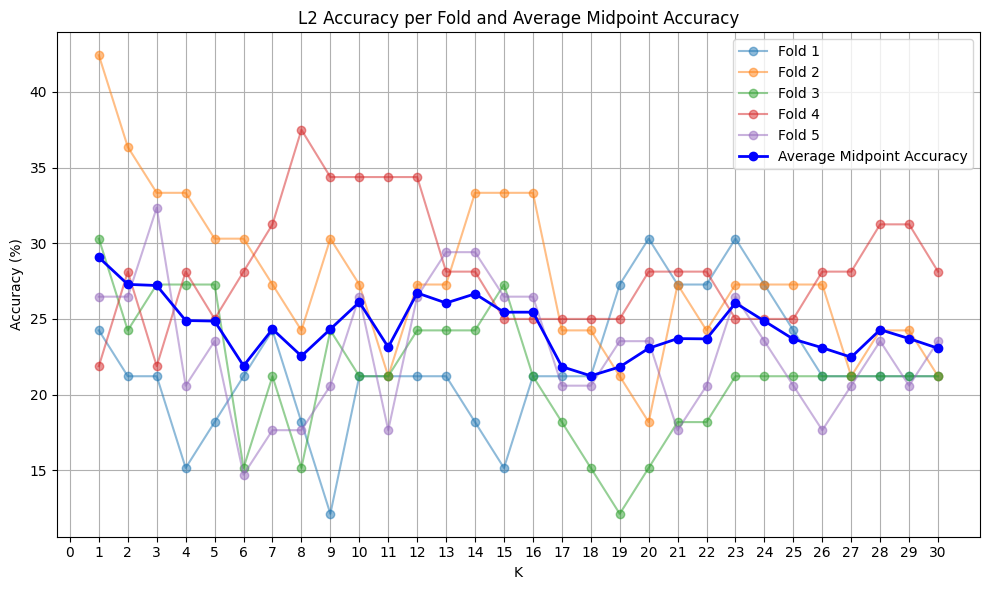

In [90]:
K = np.arange(1, 31)

plt.figure(figsize=(10, 6))

# Plot fold accuracies
for i, fold_accuracy in enumerate(Folder_accuracies):
    plt.plot(K, fold_accuracy, 'o-', label=f'Fold {i+1}', alpha=0.5)

# Plot average midpoint accuracy
plt.plot(K, average_midpoints, 'o-', color='blue', label='Average Midpoint Accuracy', linewidth=2)


plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.title('L2 Accuracy per Fold and Average Midpoint Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(0, 31, 1))
plt.tight_layout()
plt.show()

